# Importing all data from file and saving data into a DataFrame

In [1]:
import os
import json
import pathlib
from datetime import datetime
import shutil
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
directory = input("Enter directory: ")

Enter directory: /Volumes/YEE LONG/G Photos Backup


In [50]:
df = pd.DataFrame(data = {'name':[], 'date':[], 'year':[], 'day':[], 'ext':[], 'size':[]})

for f in pathlib.Path(directory).iterdir():
    date = f.name[:8]
    
    # filter non-dates
    if(not date.isnumeric() or int(date) > 20990000):
        continue
        
    day = datetime.strptime(date, "%Y%m%d").strftime("%A")
    date = int(date)
    year = int(date/10000)
    ext = f.name.split('.')[1].lower()
    name = f.name.split('.')[0]
    size = int(f.stat().st_size)
    
    temp = pd.DataFrame([[name, int(date), int(year), day, ext, int(size)]],
                   columns=['name', 'date', 'year', 'day', 'ext', 'size'])
    df = pd.concat([df, temp], ignore_index=True)
    
    
float_columns = df.select_dtypes(include=[float]).columns
df[float_columns] = df[float_columns].astype(int)
df

,name,date,year,day,ext,size
0,20211211_155929,20211211,2021,Saturday,gif,2273930
1,20220127_151300,20220127,2022,Thursday,jpg,1678337
2,20220129_112034,20220129,2022,Saturday,mp4,4454361
3,20220129_112037,20220129,2022,Saturday,heic,1782158
4,20220129_112346,20220129,2022,Saturday,mp4,3901180
...,...,...,...,...,...,...
16711,20221230_063220,20221230,2022,Friday,heic,2829434
16712,20221231_153807,20221231,2022,Saturday,heic,3848615
16713,20221231_134317,20221231,2022,Saturday,heic,1922079
16714,20221231_134224,20221231,2022,Saturday,heic,1801378


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    16716 non-null  object
 1   date    16716 non-null  int64 
 2   year    16716 non-null  int64 
 3   day     16716 non-null  object
 4   ext     16716 non-null  object
 5   size    16716 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 783.7+ KB


# Visualise photos taken every year

2022    5061
2021    1902
2020     694
2019     872
2018    3705
2017    3046
2016    1430
2014       6
Name: year, dtype: int64


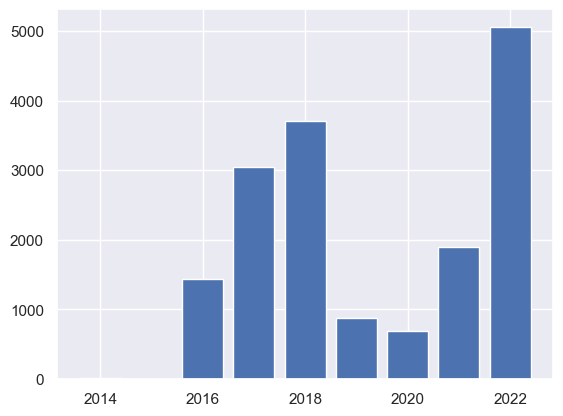

In [56]:
year_counts = df['year'].value_counts()
year_counts = year_counts.sort_index(ascending=False)
plt.bar(year_counts.index, year_counts.values)
print(year_counts)

# Visualise photos taken on different days of the week

<BarContainer object of 7 artists>

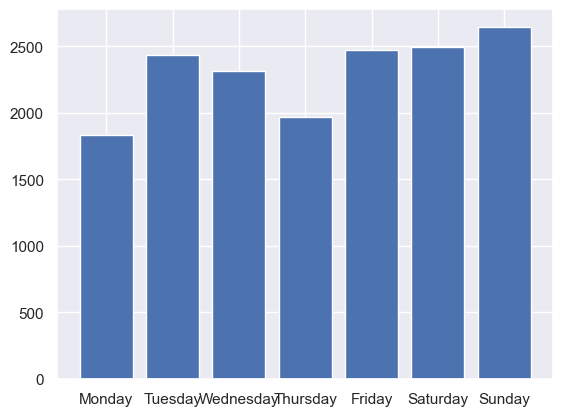

In [41]:
day_counts = df['day'].value_counts()

desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the day_counts based on the desired order
day_counts = day_counts.reindex(desired_order)
# Plotting the bar graph
plt.bar(day_counts.index, day_counts.values)

# Visualise media types

jpg      9579
heic     2969
png      1985
mp4      1553
mov       514
jpeg       69
36         28
gif        11
webp        5
34          2
06 pm       1
Name: ext, dtype: int64


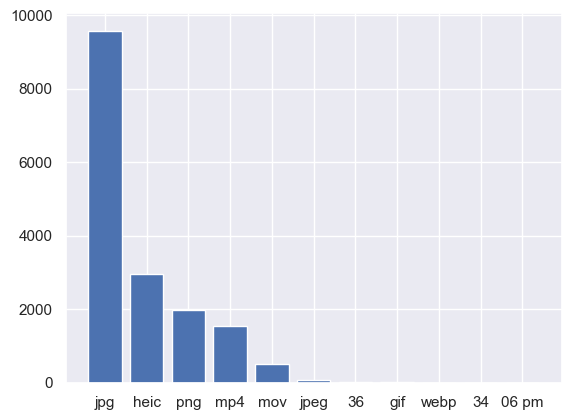

In [57]:
type_counts = df['ext'].value_counts()
plt.bar(type_counts.index, type_counts.values)
print(type_counts)

In [62]:
df['size'].sum()/1000000000

68.634635985

# Export data

In [64]:
df.to_csv('media_metadata.csv')